# Introduction to Data Science
## Project - Phase 2
## Dr. Bahrak & Dr. Yaghoobzadeh
### Kasra Ghorbani // 810101489
### Mohammad Samadi // 810101465

#### Read CSV file and keep a spare copy

In [159]:
import pandas as pd
df = pd.read_csv("preprocessed_data.csv")
df_intact = df.copy()

#### Import the required libraries

In [160]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Function to calculate Multiple regression

In [161]:
def predict_with_regline(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred = [x if x >= 0 else 0 for x in y_pred]
    r2 = r2_score(y_test, y_pred)
    print(f'R^2 Score for Reputation Score prediction: {r2}')
    n = X_test.shape[0]  # number of observations
    p = X_test.shape[1]  # number of predictors
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'Adjusted R^2 Score: {r2_adj}')
    
    return y_pred, y_test

#### Function to plot predictions against actual values when performing regression tasks

In [162]:
def plot_predictions(y_pred, y_test):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

#### Function to plot the history of a Neural Network

In [163]:
import plotly.express as px
from plotly.subplots import make_subplots

def plot_NN_result(history, R2):
    fig = make_subplots(rows=1, cols=2, subplot_titles=["R Squared Score", "Loss on Train Data"])


    fig.add_trace(px.line(R2[0]).update_traces(line_color="purple").data[0], row=1, col=1)
    fig.data[0].name = "R Squared Test"

    fig.add_trace(px.line(R2[1]).update_traces(line_color="cyan").data[0], row=1, col=1)
    fig.data[1].name = "R Squared Train"

    fig.add_trace(px.line(history.history['loss']).update_traces(line_color="red").data[0], row=1, col=2)
    fig.data[2].name = "Loss"
    fig.show()



#### Neural Network used for regression tasks

In [164]:
def predict_with_nn(features, target, epochs):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu')) 
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    r2_scores_test, r2_scores_train = [], []

    r2_callback_test = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_test.append(r2_score(y_test, model.predict(X_test))))
    r2_callback_train = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_train.append(r2_score(y_train, model.predict(X_train))))

    hist = model.fit(X_train, y_train, epochs=epochs, verbose=1, callbacks=[r2_callback_test, r2_callback_train])

    y_pred_nn = model.predict(X_test)
    y_pred_nn = [x[0] if x[0] >= 0 else 0 for x in y_pred_nn]

    r2_nn = r2_score(y_test, y_pred_nn)
    print(f'R^2 Score with Neural Network for Reputation Score prediction: {r2_nn}')

    n = X_test.shape[0]  # number of observations
    p = X_test.shape[1]  # number of predictors
    r2_adj_nn = 1 - (1 - r2_nn) * (n - 1) / (n - p - 1)
    print(f'Adjusted R^2 Score with Neural Network: {r2_adj_nn}')

    return y_pred_nn, y_test, hist, r2_scores_test, r2_scores_train


#### Select features
- We only analyse the top 5 leagues for this regression task

- We label categorical variables each with a number using label encoder

- We drop unrelated and unuseful columns so that we reduce the dimentionality of our data

In [165]:
df = df[df['Is_top_5_League'] == True]
df['Total Games'] = df['Caps'] + df['Apps']
salary_col = df['Salary']
le = LabelEncoder()
df['Division'] = le.fit_transform(df['Division'])
df.drop(['Nat', 'Last Club', 'Based', 'Begins Year', 'Expires Year', 'Caps', 'Apps', 'Salary'], axis=1, inplace=True)

#### Normalize the data and prepare for regression task

In [166]:
scaler = MinMaxScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)


# Predicting the salary using Regression and NN without PCA

### Predict Salary without PCA and using Multiple Regression

R^2 Score for Reputation Score prediction: 0.6979850721849385
Adjusted R^2 Score: 0.6922202061184792


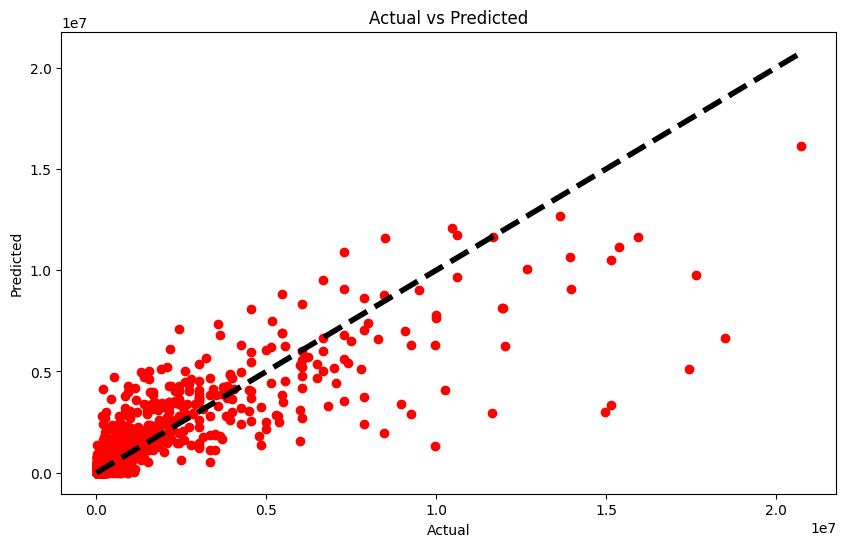

In [167]:
y_pred, y_test = predict_with_regline(df, salary_col)
plot_predictions(y_pred=y_pred, y_test=y_test)


### Predict Salary without PCA and using Neural Networks

Epoch 1/150
121/121 [==============================] - 2s 8ms/step - loss: 8378873544704.0000
Epoch 2/150
121/121 [==============================] - 1s 6ms/step - loss: 8252086026240.0000
Epoch 3/150
121/121 [==============================] - 1s 7ms/step - loss: 7177431941120.0000
Epoch 4/150
121/121 [==============================] - 1s 7ms/step - loss: 6234203750400.0000
Epoch 5/150
121/121 [==============================] - 1s 6ms/step - loss: 5980519137280.0000
Epoch 6/150
121/121 [==============================] - 1s 6ms/step - loss: 5737560932352.0000
Epoch 7/150
121/121 [==============================] - 1s 6ms/step - loss: 5484979945472.0000
Epoch 8/150
121/121 [==============================] - 1s 8ms/step - loss: 5209356500992.0000
Epoch 9/150
121/121 [==============================] - 1s 8ms/step - loss: 4932410277888.0000
Epoch 10/150
121/121 [==============================] - 1s 6ms/step - loss: 4685451231232.0000
Epoch 11/150
121/121 [==============================] - 1s 

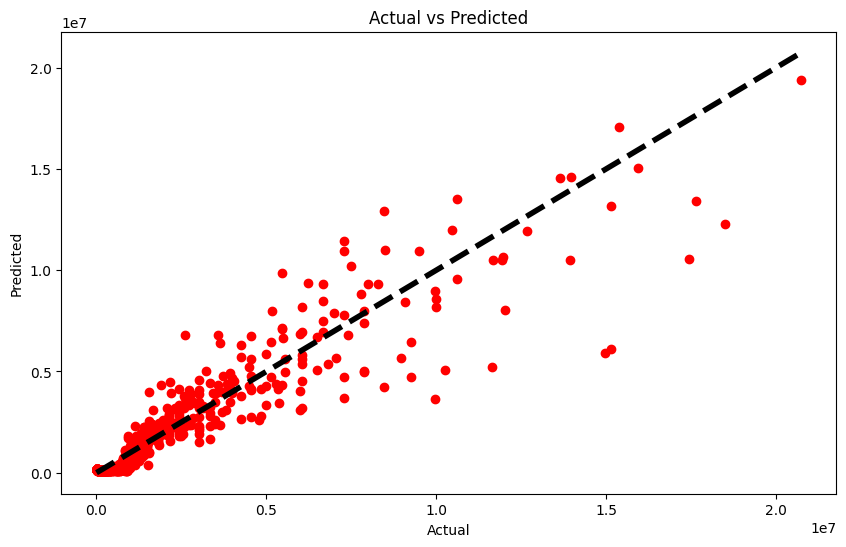

In [168]:
scaler = MinMaxScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)
pred_nn, y_test, history, R2s_test, R2s_train = predict_with_nn(df, salary_col, epochs=150)
plot_predictions(y_pred=pred_nn, y_test=y_test)
plot_NN_result(history=history, R2=[R2s_test, R2s_train])

### Predicting Salary using Regression and keeping only 2 components in our PCA

R^2 Score for Reputation Score prediction: 0.3063708967776726
Adjusted R^2 Score: 0.3049243293048418


C:\Users\Mahoor\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



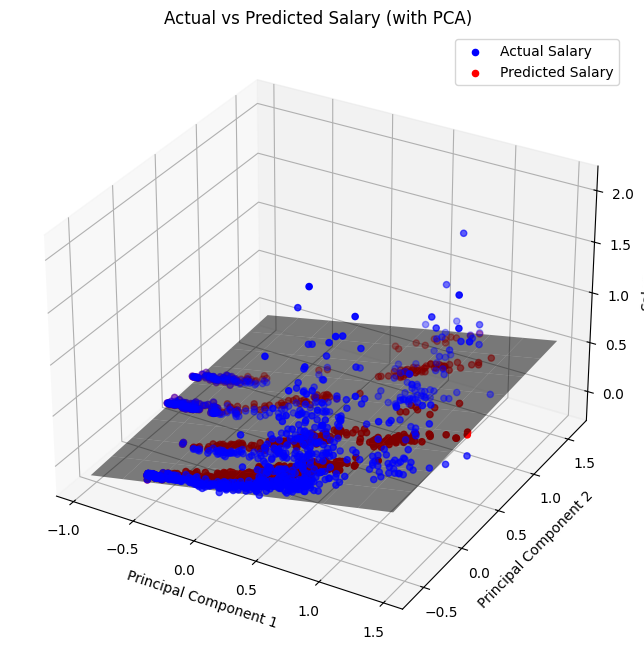

In [169]:
pca = PCA(n_components=2)
pca.fit(normalized_data)
X_pca = pca.transform(normalized_data)
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
X_train, X_test, y_train, y_test = train_test_split(df_pca, salary_col, test_size=0.2, random_state=42)
y_pred, y_test = predict_with_regline(df_pca, salary_col)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
ax.scatter(X_test['Principal Component 1'], X_test['Principal Component 2'], y_test, color='blue', label='Actual Salary')
ax.scatter(X_test['Principal Component 1'], X_test['Principal Component 2'], y_pred, color='red', label='Predicted Salary')
x_surf, y_surf = np.meshgrid(np.linspace(X_test['Principal Component 1'].min(), X_test['Principal Component 1'].max(), 10),
                             np.linspace(X_test['Principal Component 2'].min(), X_test['Principal Component 2'].max(), 10))
z_surf = regressor.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='black', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Salary')
ax.set_title('Actual vs Predicted Salary (with PCA)')
ax.legend()

plt.show()


### Multiple Regression for salary prediction when using PCA and maintaining 95% of the variance

R^2 Score for Reputation Score prediction: 0.3925509783533101
Adjusted R^2 Score: 0.38745172108869985


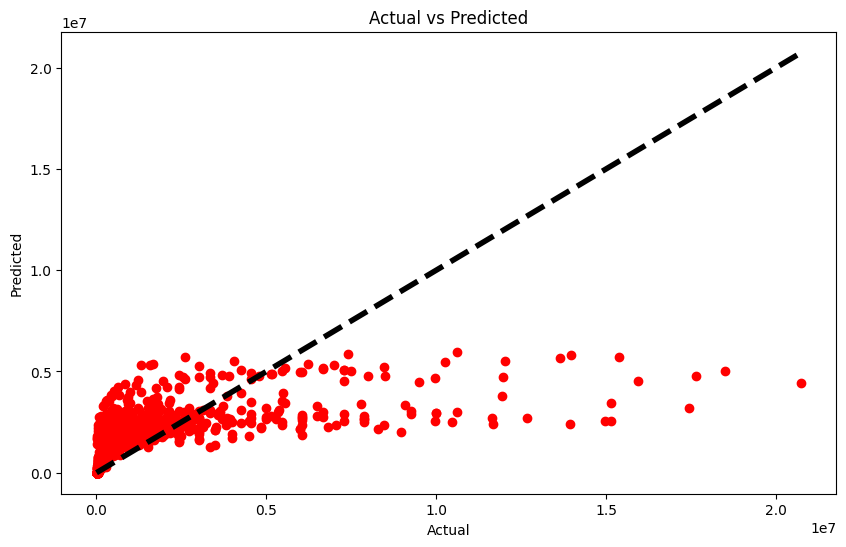

In [170]:
pca = PCA(n_components=0.95)
pca.fit(normalized_data)
X_pca = pca.transform(normalized_data)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
y_pred, y_test = predict_with_regline(df_pca, salary_col)
plot_predictions(y_pred, y_test)

### Salary Prediction with Neural Networks when using PCA to keep 95% of the variance

Epoch 1/150
121/121 [==============================] - 2s 7ms/step - loss: 8380331065344.0000
Epoch 2/150
121/121 [==============================] - 1s 6ms/step - loss: 8358199296000.0000
Epoch 3/150
121/121 [==============================] - 1s 6ms/step - loss: 8112289873920.0000
Epoch 4/150
121/121 [==============================] - 1s 6ms/step - loss: 7088846143488.0000
Epoch 5/150
121/121 [==============================] - 1s 6ms/step - loss: 5529454772224.0000
Epoch 6/150
121/121 [==============================] - 1s 6ms/step - loss: 4831757991936.0000
Epoch 7/150
121/121 [==============================] - 1s 6ms/step - loss: 4656996548608.0000
Epoch 8/150
121/121 [==============================] - 1s 8ms/step - loss: 4554295345152.0000
Epoch 9/150
121/121 [==============================] - 1s 8ms/step - loss: 4480578355200.0000
Epoch 10/150
121/121 [==============================] - 1s 6ms/step - loss: 4418149285888.0000
Epoch 11/150
121/121 [==============================] - 1s 

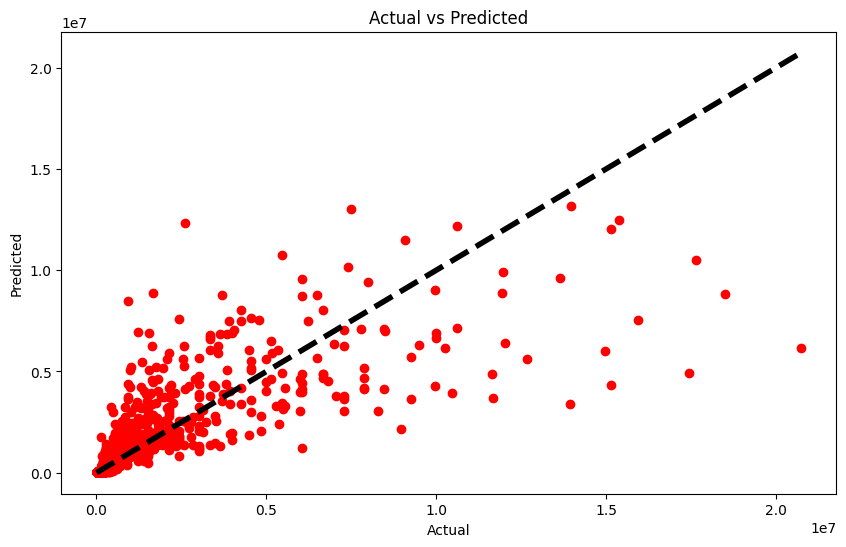

In [171]:
predd_nn, y_test, history, R2_test, R2_train = predict_with_nn(df_pca, salary_col, epochs=150)
plot_predictions(y_pred=predd_nn, y_test=y_test)
plot_NN_result(history=history, R2=[R2_test, R2s_train])

## Reputation Score prediction

### Feature Selection
- Similiar to the salary column just with the reputation column

In [172]:
df = df_intact
df = df[df['Is_top_5_League'] == True]
df['Total Games'] = df['Caps'] + df['Apps']
reputation_col = df['Reputation']
le = LabelEncoder()
df['Division'] = le.fit_transform(df['Division'])
df.drop(['Nat', 'Last Club', 'Based', 'Begins Year', 'Expires Year', 'Caps', 'Apps', 'Reputation'], axis=1, inplace=True)
df

C:\Users\Mahoor\AppData\Local\Temp\ipykernel_8832\2968703687.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mahoor\AppData\Local\Temp\ipykernel_8832\2968703687.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mahoor\AppData\Local\Temp\ipykernel_8832\2968703687.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Unnamed: 0,Division,Last Trans. Fee,Is_top_5_League,Based_rich_nation,Is_top_ranked_nation,EU_National,Age,Is_top_prev_club,Salary,Begins Month,Expires Month,under 30,Age Signing Contract,Contract Duration,is long-term contract,Games Played,Total Games
4,4,2,186000000.0,True,True,True,True,24.0,False,48467000.0,7,6,True,23,5,True,291,291
13,13,1,28000000.0,True,True,True,True,33.0,True,24233000.0,6,6,False,32,1,False,567,567
15,15,3,41000000.0,True,True,True,True,30.0,True,22733000.0,8,6,False,29,5,True,348,348
16,16,1,0.0,True,True,True,True,31.0,True,22438000.0,7,6,False,28,5,True,494,494
18,18,0,100000000.0,True,True,True,True,30.0,True,21940000.0,8,6,False,29,4,True,459,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39911,39934,4,0.0,True,True,True,True,17.0,False,1600.0,7,12,True,15,2,False,0,0
39943,39966,4,0.0,True,True,True,True,18.0,False,1600.0,7,6,True,17,7,True,0,0
40554,40577,4,0.0,True,True,False,True,17.0,False,600.0,1,6,True,16,2,False,13,13
40682,40705,1,0.0,True,True,True,False,17.0,False,300.0,7,6,True,16,1,False,0,0


### Data Normalization

In [173]:
scaler = MinMaxScaler()
scaler.fit(df)
normalized_data = scaler.transform(df)
df = pd.DataFrame(normalized_data, columns=df.columns)

### Reputaion Score prediction using Multiple Regression and without PCA

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df, reputation_col, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [x if x >= 0 else 0 for x in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score without PCA for Reputation Score prediction: {r2}')
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score: {r2_adj}')

R^2 Score without PCA for Reputation Score prediction: 0.8924840429580718
Adjusted R^2 Score: 0.8904317765458187


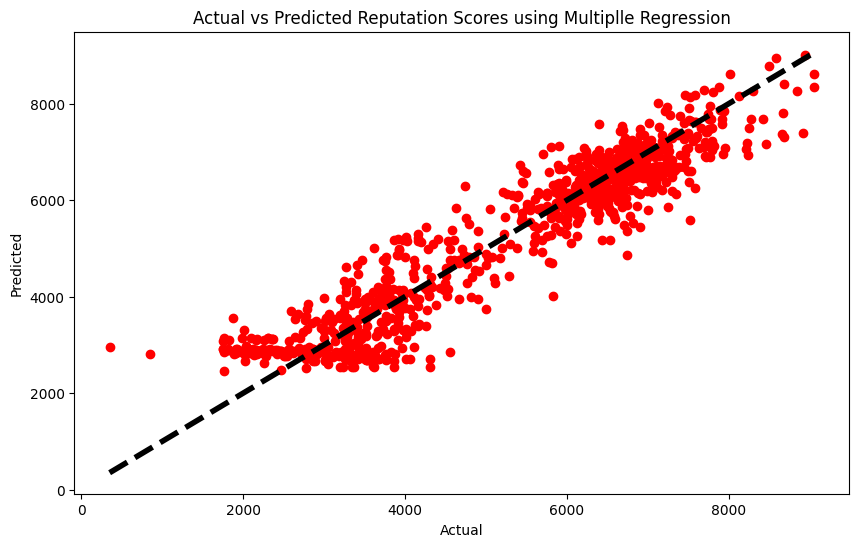

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Reputation Scores using Multiplle Regression')
plt.show()

### Reputation Score prediction using Neural Networks and without PCA

In [176]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
r2_scores_test, r2_scores_train = [], []

r2_callback_test = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_test.append(r2_score(y_test, model.predict(X_test))))
r2_callback_train = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_train.append(r2_score(y_train, model.predict(X_train))))

hist = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[r2_callback_test, r2_callback_train])

y_pred_nn = model.predict(X_test)
y_pred_nn = [x[0] if x[0] >= 0 else 0 for x in y_pred_nn]

r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score with Neural Network for Reputation Score prediction: {r2_nn}')

n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_nn = 1 - (1 - r2_nn) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score with Neural Network: {r2_adj_nn}')

plot_NN_result(history=hist, R2=[r2_scores_test, r2_scores_train])

Epoch 1/100
121/121 [==============================] - 2s 7ms/step - loss: 28273016.0000
Epoch 2/100
121/121 [==============================] - 1s 6ms/step - loss: 17482086.0000
Epoch 3/100
121/121 [==============================] - 1s 6ms/step - loss: 2489133.7500
Epoch 4/100
121/121 [==============================] - 1s 8ms/step - loss: 1867733.5000
Epoch 5/100
121/121 [==============================] - 1s 6ms/step - loss: 1452997.3750
Epoch 6/100
121/121 [==============================] - 1s 6ms/step - loss: 1143843.3750
Epoch 7/100
121/121 [==============================] - 1s 6ms/step - loss: 950939.8125
Epoch 8/100
121/121 [==============================] - 1s 6ms/step - loss: 834081.5625
Epoch 9/100
121/121 [==============================] - 1s 6ms/step - loss: 752159.3125
Epoch 10/100
121/121 [==============================] - 1s 6ms/step - loss: 686888.2500
Epoch 11/100
121/121 [==============================] - 1s 6ms/step - loss: 630582.2500
Epoch 12/100
121/121 [===========

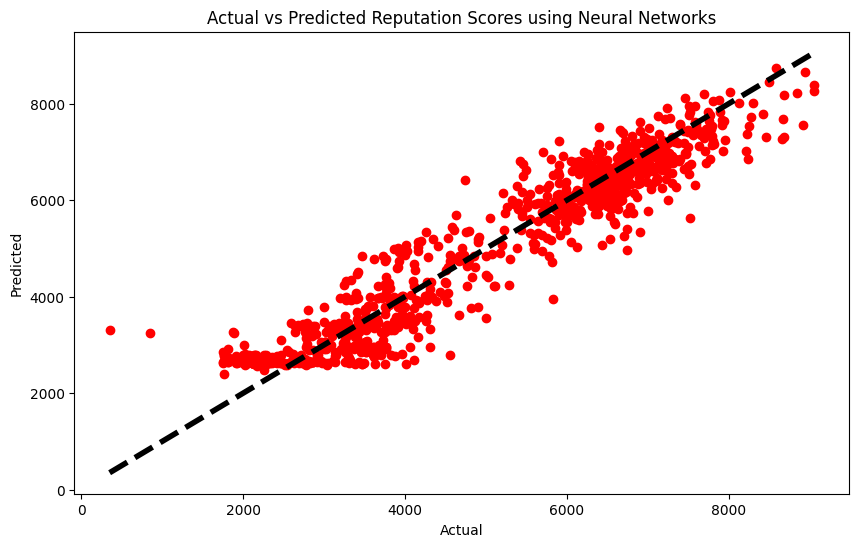

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Reputation Scores using Neural Networks')
plt.show()

### Reputation Score prediction when only keeping 2 components while using PCA

In [178]:
pca = PCA(n_components=2)
pca.fit(normalized_data)
X_pca = pca.transform(normalized_data)
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
X_train, X_test, y_train, y_test = train_test_split(df_pca, reputation_col, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [x if x >= 0 else 0 for x in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score with 2 PCA components for Reputation prediction: {r2}')
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score: {r2_adj}')

R^2 Score with 2 PCA components for Reputation prediction: 0.7268237500621408
Adjusted R^2 Score: 0.7262540394261912


C:\Users\Mahoor\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



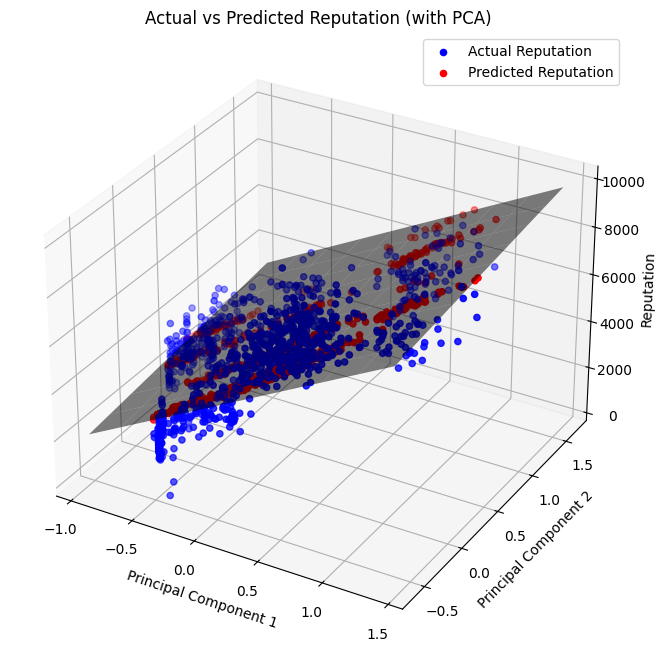

In [179]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Principal Component 1'], X_test['Principal Component 2'], y_test, color='blue', label='Actual Reputation')
ax.scatter(X_test['Principal Component 1'], X_test['Principal Component 2'], y_pred, color='red', label='Predicted Reputation')
x_surf, y_surf = np.meshgrid(np.linspace(X_test['Principal Component 1'].min(), X_test['Principal Component 1'].max(), 10),
                             np.linspace(X_test['Principal Component 2'].min(), X_test['Principal Component 2'].max(), 10))
z_surf = regressor.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='black', alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Reputation')
ax.set_title('Actual vs Predicted Reputation (with PCA)')
ax.legend()

plt.show()

### Reputation Score prediction when using PCA to keep 95% of our variance and using Multiple regression

In [180]:
pca = PCA(n_components=0.95)
pca.fit(normalized_data)
X_pca = pca.transform(normalized_data)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_train, X_test, y_train, y_test = train_test_split(df_pca, reputation_col, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [x if x >= 0 else 0 for x in y_pred]
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score with PCA capturing 95% of the variance for Reputation Score prediction: {r2}')
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score: {r2_adj}')

R^2 Score with PCA capturing 95% of the variance for Reputation Score prediction: 0.873771928731846
Adjusted R^2 Score: 0.8727123016907702


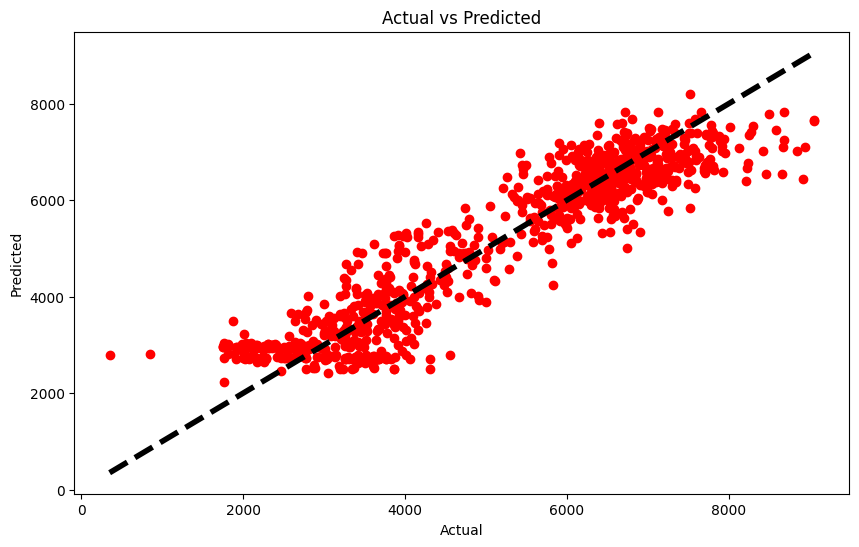

In [181]:
plot_predictions(y_pred=y_pred, y_test=y_test)

### Reputation Score prediction when using Neural Networks and with PCA to keep 95% of the variance

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, reputation_col, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
    
r2_scores_test, r2_scores_train = [], []

r2_callback_test = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_test.append(r2_score(y_test, model.predict(X_test))))
r2_callback_train = LambdaCallback(on_epoch_end=lambda epoch, logs: r2_scores_train.append(r2_score(y_train, model.predict(X_train))))

hist = model.fit(X_train, y_train, epochs=20, verbose=1, callbacks=[r2_callback_test, r2_callback_train])

yyyy_pred_nn = model.predict(X_test)
yyyy_pred_nn = [x[0] if x[0] >= 0 else 0 for x in yyyy_pred_nn]

r2_nn = r2_score(y_test, yyyy_pred_nn)
print(f'R^2 Score with Neural Network for Reputation Score prediction: {r2_nn}')

n = X_test.shape[0]
p = X_test.shape[1]
r2_adj_nn = 1 - (1 - r2_nn) * (n - 1) / (n - p - 1)
print(f'Adjusted R^2 Score with Neural Network: {r2_adj_nn}')

plot_NN_result(history=hist, R2=[r2_scores_test, r2_scores_train])

Epoch 1/20
121/121 [==============================] - 2s 7ms/step - loss: 28360272.0000
Epoch 2/20
121/121 [==============================] - 1s 6ms/step - loss: 23819718.0000
Epoch 3/20
121/121 [==============================] - 1s 7ms/step - loss: 4082231.5000
Epoch 4/20
121/121 [==============================] - 1s 6ms/step - loss: 429109.4062
Epoch 5/20
121/121 [==============================] - 1s 7ms/step - loss: 404566.8438
Epoch 6/20
121/121 [==============================] - 1s 6ms/step - loss: 394948.2500
Epoch 7/20
121/121 [==============================] - 1s 6ms/step - loss: 387863.0938
Epoch 8/20
121/121 [==============================] - 1s 6ms/step - loss: 381360.9375
Epoch 9/20
121/121 [==============================] - 1s 6ms/step - loss: 376331.4062
Epoch 10/20
121/121 [==============================] - 1s 6ms/step - loss: 371915.8438
Epoch 11/20
121/121 [==============================] - 1s 6ms/step - loss: 369084.4688
Epoch 12/20
121/121 [==========================

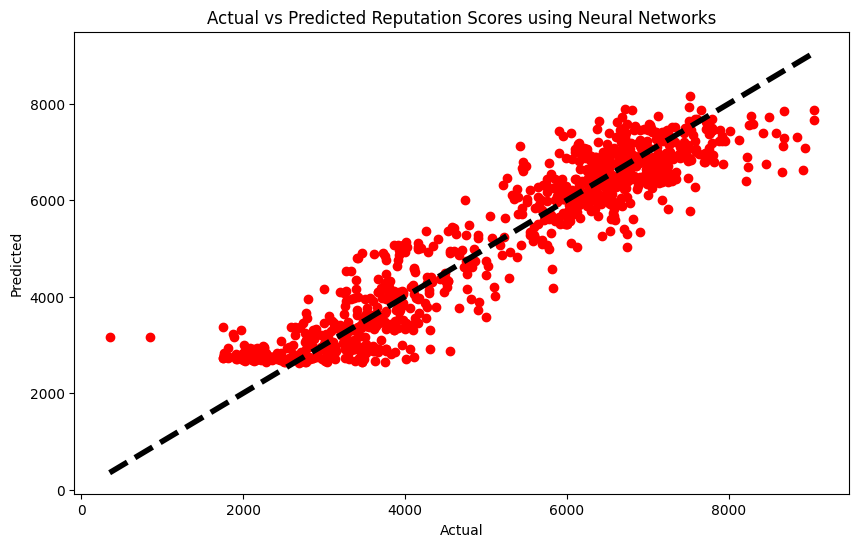

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yyyy_pred_nn, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Reputation Scores using Neural Networks')
plt.show()

### Why is reputation prediction working better than salary prediction
#### Variability in R² Scores:
 The difference in R² scores for the two variables, both with and without PCA, could be due to several factors:
Inherent Data Characteristics: Reputation score may inherently have a stronger linear relationship with the predictors, leading to a higher R² score.

Model Suitability: The regression model might be more suitable for the patterns and relationships present in one variable compared to the other.

#### Impact of PCA on R² Scores:

Information Loss: PCA reduces dimensionality by projecting the original data onto a smaller set of orthogonal components that capture most of the variance. Reputation score likely had most of its informative variance retained after PCA. In contrast, the variable with a larger decrease (0.2) might have lost more informative variance that was crucial for prediction.

Noise Reduction: If PCA led to noise reduction, the variable with a minor R² score decrease which is Reputation in this case might have had less noise associated with its predictors, to begin with. Therefore, the impact of noise reduction on the R² score was less pronounced.

Model Complexity: The complexity of the relationship between predictors and the dependent variable can also play a role. If the relationship is complex and PCA removes components that capture this complexity, the R² score could drop more significantly.